## 4- Daily Summary Table

How to import the daily summary table & demonstrations of what information it has.

Written by Jess Breda May 2023

### 1.1 Libraries

In [1]:
from create_summary_table import fetch_daily_summary_info
from plot_summary_table import *

import seaborn as sns
import matplotlib.pyplot as plt

# settings
%load_ext autoreload
%autoreload 2

sns.set_context("talk")

[2023-05-28 13:17:50,848][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-05-28 13:17:51,644][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


### 1.2 Assumptions

1. This code will grab info for any date when the animal had an entry in the `Sessions` table or the `Mass` table.

2. It is pulling the restriction volume from the `Water` table. This volume only gets entered if pub is run that day. If there is no entry, it defaults to 4% for mice and 3% for rats. To know when this is happening set `verbose = True` on the `fetch_daily_water_target` call.

3. If `AdlibGUI` is not turned on for the animal `Waptor ON`, there will be no rig volume in the RigWater table and it will default to 0. To know when this is happening set `verbose = True` on the `fetch_rig_volume` call.

### 2. Fetch for a single animal

Create the daily summary dataframe using the `fetch_daily_summary_info` function. If you have the datajoint environment set up (see README), this should run for any animal(s). 

In [20]:
ANIMAL_ID = ["A325"]

animal_df = fetch_daily_summary_info(animal_ids=ANIMAL_ID, date_min="2023-05-01", date_max="2023-05-15")

mass data not found for A325 on 2023-05-10, but animal trained using previous days mass
fetched 14 daily summaries for A325 between 2023-05-01 and 2023-05-15


In [3]:
animal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   animal_id       26 non-null     object 
 1   date            26 non-null     object 
 2   rigid           14 non-null     object 
 3   n_done_trials   14 non-null     float64
 4   n_sessions      26 non-null     int64  
 5   start_time      14 non-null     object 
 6   train_dur_hrs   26 non-null     float64
 7   trial_rate      14 non-null     float64
 8   hit_rate        14 non-null     float64
 9   viol_rate       14 non-null     float64
 10  side_bias       14 non-null     float64
 11  mass            26 non-null     float64
 12  tech            25 non-null     object 
 13  percent_target  26 non-null     float64
 14  pub_volume      26 non-null     float64
 15  rig_volume      26 non-null     float64
 16  volume_target   26 non-null     float64
 17  water_diff      26 non-null     float

In [4]:
animal_df.head()

,animal_id,date,rigid,n_done_trials,n_sessions,start_time,train_dur_hrs,trial_rate,hit_rate,viol_rate,side_bias,mass,tech,percent_target,pub_volume,rig_volume,volume_target,water_diff
0,A325,2023-05-01,Rig205,604.0,1,11:11:00,2.29,263.76,0.75,0.04,0.00,478.0,JL,3.0,0.000,16.956,14.34,2.616
1,A325,2023-05-02,Rig205,613.0,1,10:52:57,2.46,249.19,0.74,0.07,0.02,475.0,JL,3.0,0.000,16.404,14.25,2.154
2,A325,2023-05-03,Rig205,507.0,1,11:34:41,1.97,257.36,0.72,0.05,0.00,477.0,KO,3.0,1.116,13.270,14.31,0.076
3,A325,2023-05-04,Rig205,523.0,1,11:12:52,2.25,232.44,0.71,0.07,0.06,487.0,JL,3.0,2.016,12.745,14.61,0.151
4,A325,2023-05-05,Rig205,591.0,1,11:00:05,2.38,248.32,0.72,0.07,0.04,480.0,JL,3.0,0.000,14.995,14.40,0.595


### 3. Visualize

Examples of how to use plotting functions with the daily summary dataframe of a single animal

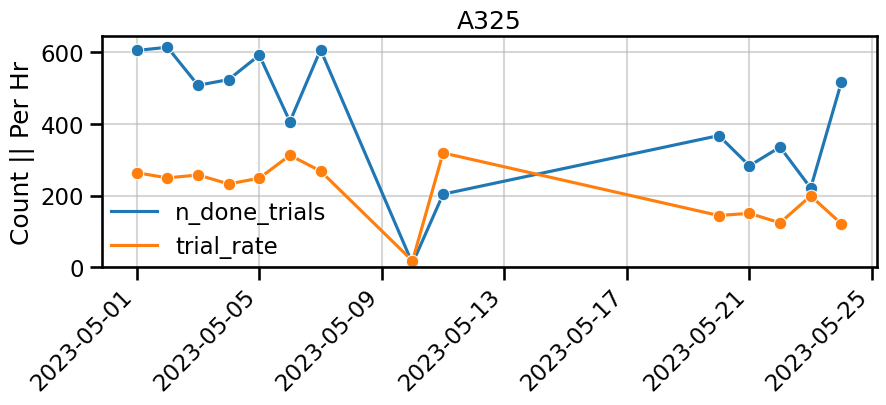

In [5]:
# Plot number of done trials and rate of trials/hr over dates

fig,ax = make_fig() # helper function
plot_trials(animal_df, ax, title= ANIMAL_ID[0], legend=True)


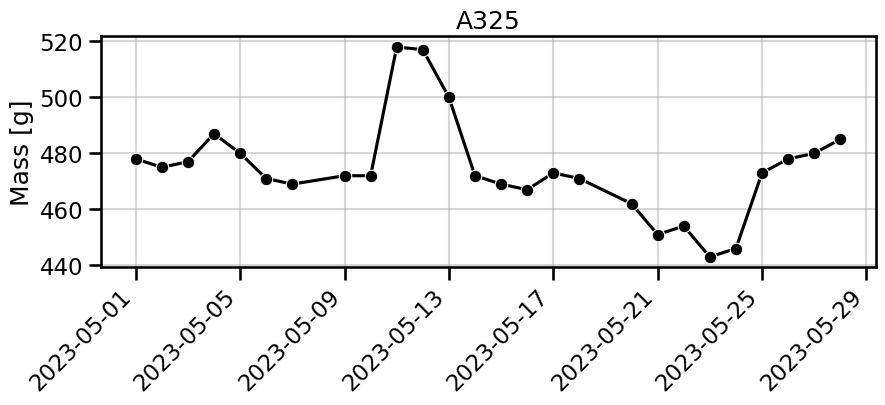

In [6]:
# Plot mass over dates

fig,ax = make_fig()
plot_mass(animal_df, ax, title=ANIMAL_ID[0])


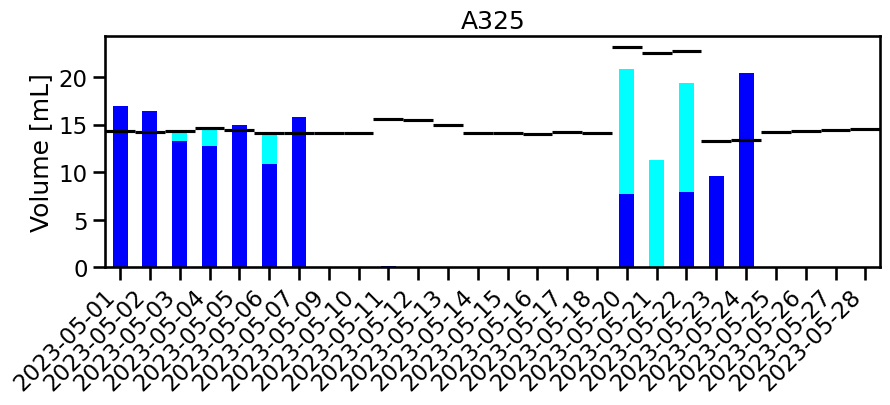

In [7]:
# Plot water restriction over dates

fig,ax = make_fig()
plot_water_restriction(animal_df, ax, title=ANIMAL_ID[0], legend=False)

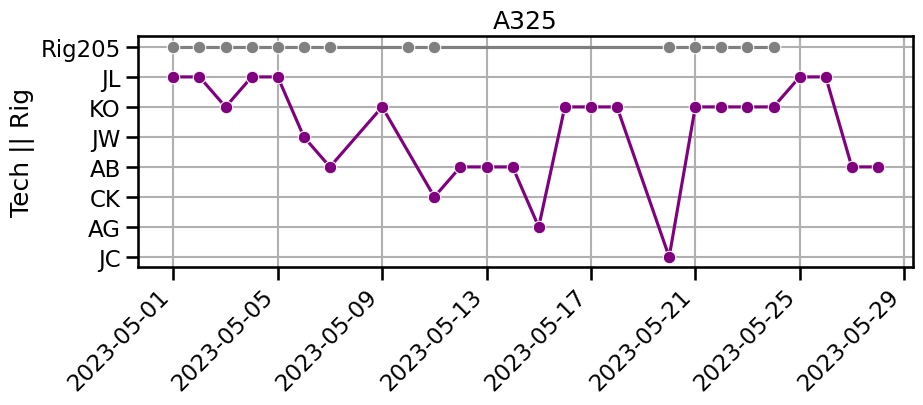

In [8]:
# Plot rig / tech over dates

fig,ax = make_fig()
plot_rig_tech(animal_df, ax, title=ANIMAL_ID[0])


### 4. Extensions

#### 4.1 Multi-plot summary

Here's an example of how to easily make a subplot for an animal using `subplot_mosiac`

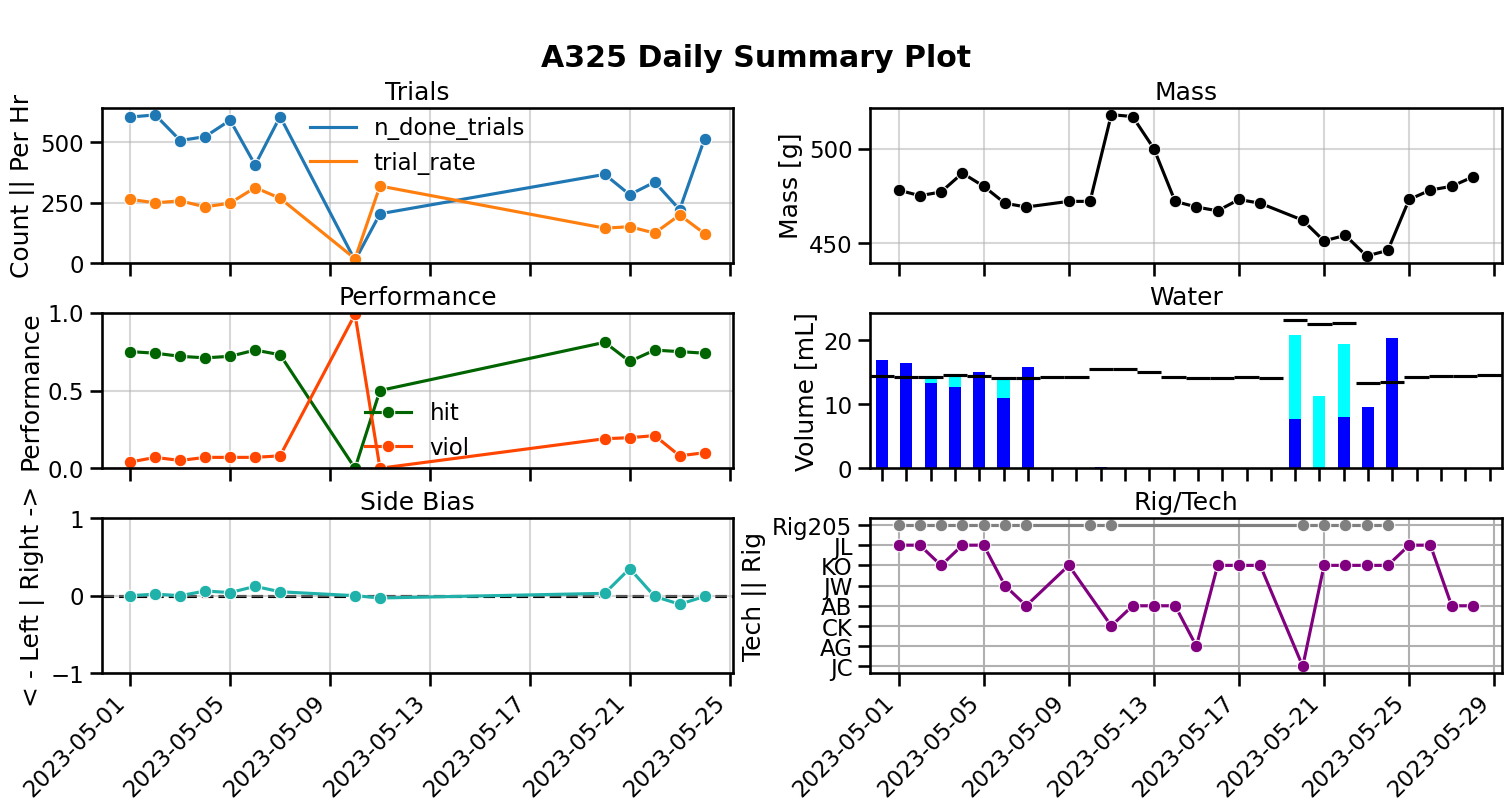

In [9]:

## Initialize mutli-axis figure
layout = """
    AAABBB
    CCCDDD
    EEEFFF
"""
fig = plt.figure(constrained_layout=True, figsize=(15,8))
ax_dict = fig.subplot_mosaic(layout)  # ax to plot to
plt.suptitle(f"\n{ANIMAL_ID[0]} Daily Summary Plot", fontweight="semibold")


## Plot
# left column
plot_trials(animal_df, ax_dict["A"], title="Trials", legend=True, xaxis_label=False)
plot_performance(animal_df, ax_dict["C"], title="Performance", xaxis_label=False)
plot_side_bias(animal_df, ax_dict["E"], title="Side Bias", xaxis_label=True)

# right column
plot_mass(animal_df, ax_dict["B"], title="Mass", xaxis_label=False)
plot_water_restriction(animal_df, ax_dict["D"], title="Water", legend=False, xaxis_label=False)
plot_rig_tech(animal_df, ax_dict["F"], title="Rig/Tech", xaxis_label=True)


#### 4.2 Date window generator

This is handy helper function for generating date windows. For example, I commonly search for 7 days back from the current date. Then, you can only query this date range in datajoint.

In [10]:
date_min, date_max = return_date_window(latest_date=None, n_days_back=7)
print(f"date min = {date_min}, date max = {date_max}")

date min = 2023-05-21, date max = 2023-05-28


In [11]:
dw_df = fetch_daily_summary_info(animal_ids=ANIMAL_ID, date_min=date_min, date_max=date_max)
dw_df

rig volume was empty on 2023-05-21, defaulting to 0 mL
rig volume was empty on 2023-05-25, defaulting to 0 mL
rig volume was empty on 2023-05-26, defaulting to 0 mL
rig volume was empty on 2023-05-27, defaulting to 0 mL
rig volume was empty on 2023-05-28, defaulting to 0 mL
fetched 8 daily summaries for A325 between 2023-05-21 and 2023-05-28


,animal_id,date,rigid,n_done_trials,n_sessions,start_time,train_dur_hrs,trial_rate,hit_rate,viol_rate,side_bias,mass,tech,percent_target,pub_volume,rig_volume,volume_target,water_diff
0,A325,2023-05-21,Rig205,283.0,2,11:21:26,1.88,150.53,0.68689,0.196537,0.348622,451.0,KO,5.0,11.304,0.0000,22.55,-11.2460
1,A325,2023-05-22,Rig205,335.0,1,15:26:27,2.70,124.07,0.76000,0.210000,-0.010000,454.0,KO,5.0,11.412,7.9188,22.70,-3.3692
2,A325,2023-05-23,Rig205,221.0,1,14:03:06,1.11,199.10,0.75000,0.080000,-0.110000,443.0,KO,0.0,0.000,9.5638,13.29,-3.7262
3,A325,2023-05-24,Rig205,515.0,1,15:01:56,4.23,121.75,0.74000,0.100000,-0.010000,446.0,KO,0.0,0.000,20.3700,13.38,6.9900
4,A325,2023-05-25,NaN,NaN,0,NaN,0.00,NaN,NaN,NaN,NaN,473.0,JL,0.0,0.000,0.0000,14.19,-14.1900
5,A325,2023-05-26,NaN,NaN,0,NaN,0.00,NaN,NaN,NaN,NaN,478.0,JL,0.0,0.000,0.0000,14.34,-14.3400
6,A325,2023-05-27,NaN,NaN,0,NaN,0.00,NaN,NaN,NaN,NaN,480.0,AB,0.0,0.000,0.0000,14.40,-14.4000
7,A325,2023-05-28,NaN,NaN,0,NaN,0.00,NaN,NaN,NaN,NaN,485.0,AB,0.0,0.000,0.0000,14.55,-14.5500


#### 4.3 Multiple animals

The code allows you to fetch multiple animals at a time by passing in a list. You can then use `groupby` functions for plotting

In [79]:
# Load in 

MULTIANIMAL_IDS = ["R610", "W600"]
mutlianimal_df = fetch_daily_summary_info(animal_ids=MULTIANIMAL_IDS, date_min="2023-05-15")

[2023-05-29 09:42:14,997][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 15 daily summaries for R610 between 2023-05-15 and 2023-05-29
fetched 14 daily summaries for W600 between 2023-05-15 and 2023-05-28


In [80]:
# Check that mutlianimal load in worked
mutlianimal_df.animal_id.unique()

array(['R610', 'W600'], dtype=object)

<Axes: title={'center': 'Mean trial rate'}, xlabel='animal_id'>

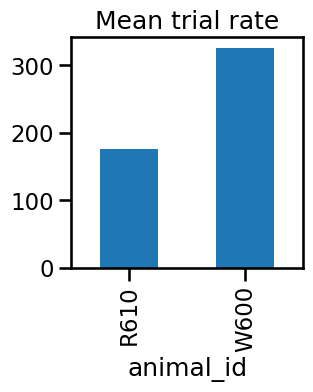

In [14]:
# Plot average trial rate per animal

fig,ax=make_fig((3,3))
mutlianimal_df.groupby(
    ["animal_id"]
    ).trial_rate.mean().plot(
    kind="bar", title="Mean trial rate"
    )

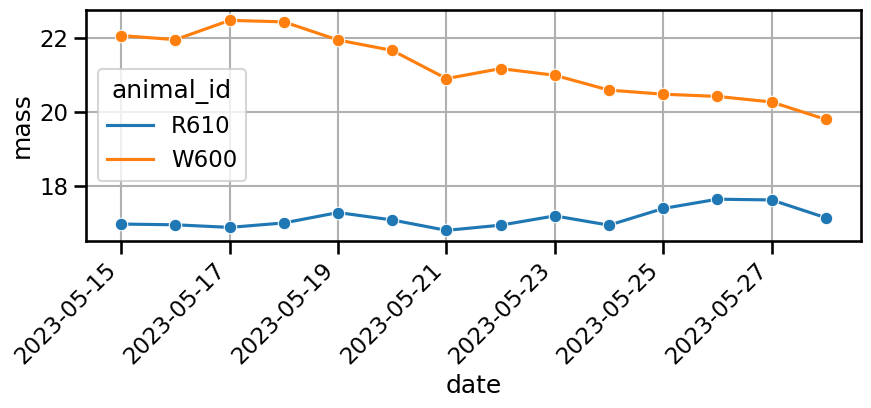

In [15]:
## Plot mass over time conditioned on animal id

fig,ax = plt.subplots(1,1, figsize=(10,3))

sns.lineplot(data=mutlianimal_df, x="date", y="mass", hue="animal_id", marker="o", ax=ax)

set_date_x_ticks(ax,xaxis_label=True)
ax.grid()

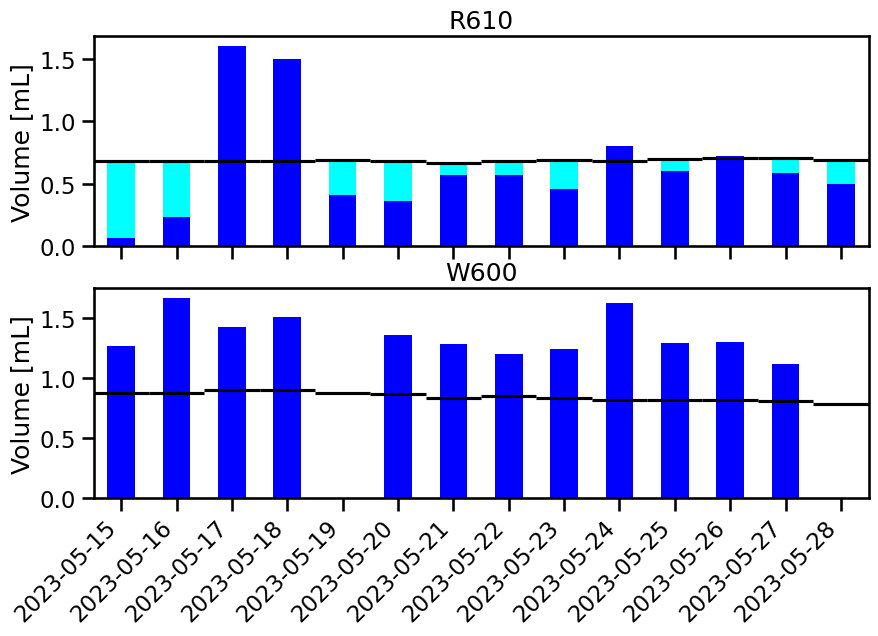

In [16]:
# Plot water restriction over time conditioned on animal id

fig,ax = plt.subplots(2,1, figsize=(10,6), sharex=True)

for ii, (animal_id, sub_df) in enumerate(mutlianimal_df.groupby("animal_id")):
    plot_water_restriction(sub_df, ax[ii], title=animal_id, legend=False, xaxis_label=True)


#### 4.4 Overwrite checks

Making the summary data frame is time consuming. To avoid this you can do a "lazy load" and only read in the new dates from bdata and merge this with a dataframe containing the previous dates.

This functionality is implemented with the `overwrite`, `save_out` and `save_path` variables.

In [19]:
# I want to write a function that takes in a list of animal_ids, date_min, date_max,
#  overwrite bool, save_path, save_out, and f_name. It will return a dataframe.

# if overwrite is True, then it will overwrite the file at save_path/f_name and fully load the
# data frame from a datajoint server given date_min and date_max.

# if overwrite is false. It will check if the file exists at save_path/f_name. If it does, it will
# load the file and check to see if there are any dates in the date_min, date_max range that are
# not in the dataframe. If there are, it will load the missing dates from the datajoint server
# and append them to the dataframe. If there are no missing dates, it will return the dataframe.

# if save_out is true, it will save the dataframe to save_path/f_name

def fetch_daily_summary_info(animal_ids, date_min, date_max, overwrite, save_path, f_name, save_out):

    # check if overwrite is on
    if overwrite:
        #check to see if save_path/f_name exists using Path library
        if Path(save_path/f_name).exists():
            # if it does, load the dataframe
            df = pd.read_csv(save_path/f_name)

            # get date range in df and see if it is the same as date_min, date_max
            df_date_min = df.date.min()
            df_date_max = df.date.max()
            # determine if there are any dates not covered & which dates to load
            




In [32]:
animal_df.date.min()

from create_summary_table import bdata, ratinfo

In [46]:
pre_saved_df = animal_df.copy()

In [92]:
pre_saved_df.animal_id.unique()

array(['A325'], dtype=object)

In [101]:
ids = np.array(["W600", "R610"])
excluded_animals = np.setdiff1d(ids, mutlianimal_df.animal_id.unique())
    

In [102]:
# save out mutli animal df
mutlianimal_df.to_csv("mutlianimal_df.csv", index=False)

In [112]:
ddf = pd.read_csv(full_path)

In [121]:
ddf.date.min(), ddf.date.max(
)

('2023-05-15', '2023-05-29')

In [115]:
animal

array(['R610, W600'], dtype='<U10')

In [156]:
from pathlib import Path
import os
from IPython.core.debugger import set_trace as dbstop
# given a date_min, date_max I want to see if the dataframe has any missing dates
overwrite = True
date_min = "2023-05-13"
date_max = "2023-05-29"
animal_ids = ["R610", "W600"]
animals_daily_summary_df = []
# save_path ="as/f/d/jkahsdf"
save_dir = "/Users/jessbreda/Desktop/github/DataJoint-SQL-Tutorial"
f_name= "mutlianimal_df.csv"

full_path = Path(save_dir).joinpath(f_name)


def get_daily_summary_df(
        animal_ids=["R610", "W600"], 
        date_min="2000-01-01", 
        date_max="2030-01-01", 
        overwrite=True, 
        save_dir=os.getcwd(), 
        f_name="mutlianimal_df.csv", 
        save_out=False, 
        verbose=False
):
    full_path = Path(save_dir).joinpath(f_name)

    if overwrite and full_path.exists():
        print("it's here!")
        pre_saved_df = pd.read_csv(full_path)

        # determine if there are any dates not covered & which dates to load
        print("checkin new dates")
        excluded_animals = np.setdiff1d(animal_ids, pre_saved_df.animal_id.unique())
        if len(excluded_animals):
            print(f"Pre-saved df does not contain {excluded_animals}! overwrite functionality assumes all animals are in the df.")
            return None
        
        new_dates = pd.date_range(start=date_min, end=date_max).difference(
            pd.date_range(start=pre_saved_df.date.min(), end=pre_saved_df.date.max())
        )
        if not len(new_dates):
            # no new dates to load, append the previously saved df
            print(f"Loaded prev-saved df with entries between {date_min} and {date_max}.")
            return pre_saved_df
        else:
            # update date min and max to account for new dates
            date_min = new_dates.min().strftime("%Y-%m-%d")
            date_max = new_dates.max().strftime("%Y-%m-%d")
            print(f"doing partial load and appending new dates between {date_min} and {date_max}")
    else:
        print(f"No pre-saved df found, loading from datajoint.")



In [157]:
get_daily_summary_df(date_min=date_min, date_max=date_max)

it's here!
checkin new dates
doing partial load and appending new dates between 2023-05-13 and 2023-05-14


Stopped here things to do:

1. make a data frame, save it to a path etc and test the above code. The return statements can be printed for now
2. If it works, then it's time to start making sure the return statements work by wrapping it into a bigger function like fetch_daily_summary_info_overwrite
3. Add in the code that iterates over the animalids and fetches for dates that are needed. Actually maybe just use fetch_daily_summary_info() but change the name. To `fetch_new_info()` or something like that

4. test these
5. add in doc strings


In [ ]:

# subject_key = {"ratname": animal_id}
# sess_date_min_key = f"sessiondate >= '{date_min}'"
# sess_date_max_key = f"sessiondate <= '{date_max}'"
# mass_date_min_key = f"date >= '{date_min}'"
# mass_date_max_key = f"date <= '{date_max}'"

# # get dates where there are entries to sessions or mass table
# sess_dates = (
#     bdata.Sessions & subject_key & sess_date_min_key & sess_date_max_key
# ).fetch("sessiondate")

# mass_dates = (
#     ratinfo.Mass & subject_key & mass_date_min_key & mass_date_max_key
# ).fetch("date")

# dates = np.unique(np.concatenate((mass_dates, sess_dates)))  # drop repeats



In [54]:
if 'pre_saved_dff' in locals() and isinstance(pre_saved_df, pd.DataFrame):
    print('its here!')
else:
    print('not here!')

not here!


In [44]:
if not len(new_dates):
    # if there are no new dates, return the dataframe
else:
    # if there are new dates, load them from datajoint and append them to the dataframe




no new dates


In [40]:
subject_key = {"ratname": animal_id}
sess_date_min_key = f"sessiondate >= '{new_dates.min()}'"
sess_date_max_key = f"sessiondate <= '{new_dates.max()}'"
mass_date_min_key = f"date >= '{new_dates.min()}'"
mass_date_max_key = f"date <= '{new_dates.max()}'"

# get dates where there are entries to sessions or mass table
sess_dates = (
    bdata.Sessions & subject_key & sess_date_min_key & sess_date_max_key
).fetch("sessiondate")

mass_dates = (
    ratinfo.Mass & subject_key & mass_date_min_key & mass_date_max_key
).fetch("date")

In [43]:
dates = np.unique(np.concatenate((mass_dates, sess_dates)))  # drop repeats
dates # if this is 0, skip creating animal_dialy summary_df for that animal 


array([], dtype=object)